<h1><center><b>Machine Learning</b></center></h1>
<h4><center>K-Means and PCA<center></h4>

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [161]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [176]:
## Generate 2D data
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

/tmp/ipykernel_402090/1871301639.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


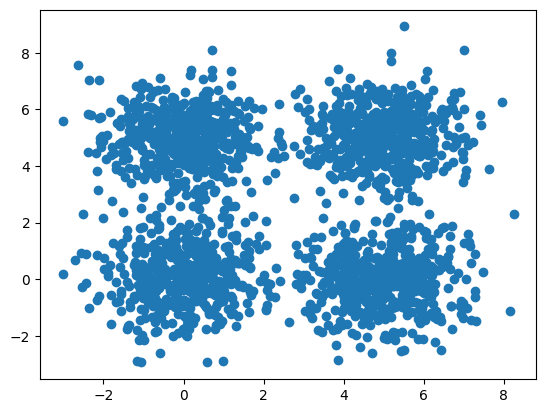

In [177]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [178]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.



    def fit(self, X):
        self.X_fit_ = X
        n_samples, n_features = X.shape
        
        # Initialize centroids randomly from the dataset
        np.random.seed(42)
        initial_centroids_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[initial_centroids_indices]

        for i in range(self.max_iter):
            # Assign labels to each point based on centroids
            labels = self._get_labels(X)
            self.labels_history.append(labels)
            
            # Calculate new centroids
            new_centroids = self._get_centroids(X, labels)
            self.centroids_history.append(new_centroids)
            
            # Calculate cost
            cost = self._calculate_cost(X)
            self.costs.append(cost)
            
            # Check for convergence (if centroids do not change)
            if np.all(new_centroids == self.centroids):
                break

            self.centroids = new_centroids
        
        self.labels_ = labels

    def predict(self, X):
        return self._get_labels(X)

    def _get_distances(self, X):
        # Calculate the distance between each point and the centroids
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances

    def _get_labels(self, X):
        # Assign the nearest centroid to each point
        distances = self._get_distances(X)
        return np.argmin(distances, axis=1)

    def _get_centroids(self, X, labels):
        # Calculate the mean of the points in each cluster
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                centroids[i] = points_in_cluster.mean(axis=0)
        return centroids

    def _calculate_cost(self, X):
        # Calculate the cost (sum of squared distances of samples to their closest centroid)
        distances = self._get_distances(X)
        closest_distances = np.min(distances, axis=1)
        cost = np.sum(closest_distances**2)
        return cost




Run the algorithm on the 2D dataset

In [179]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

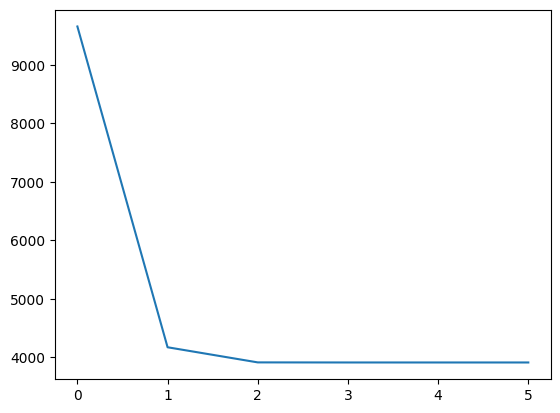

In [180]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: <br>
3 clusters: <br>
4 clusters: <br>
6 clusters: <br>
8 clusters: <br>
10 clusters: <br>
20 clusters: <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

2 clusters: 16388.002363866108
3 clusters: 9797.8939010896
4 clusters: 3914.344160901289
6 clusters: 3236.650620075555
8 clusters: 2565.83753368624
10 clusters: 2144.8593613091957
20 clusters: 1171.3040721446691


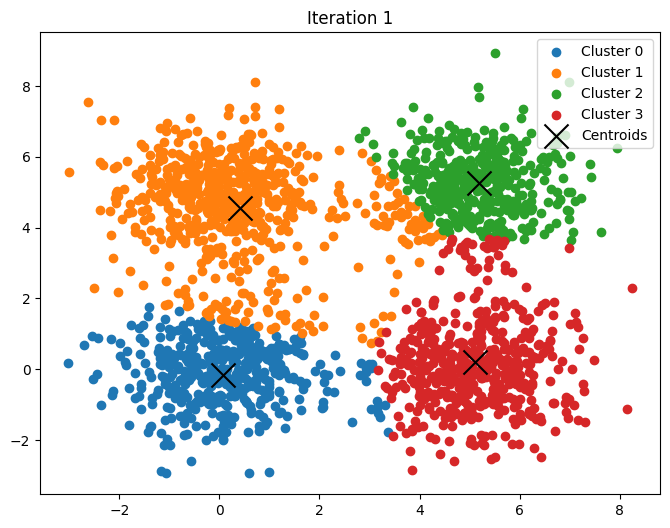

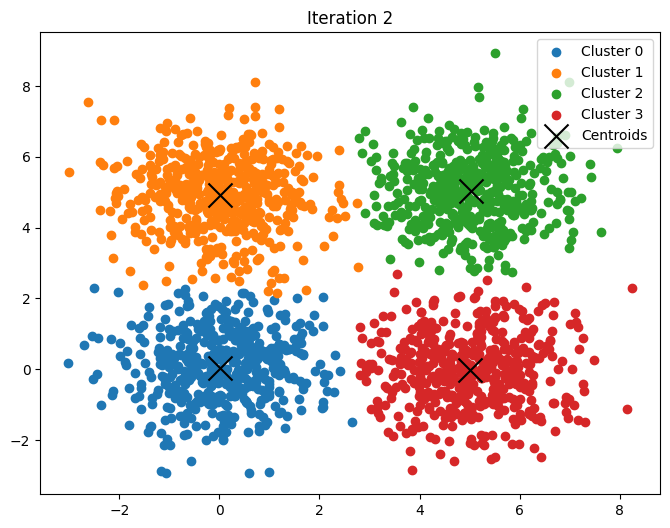

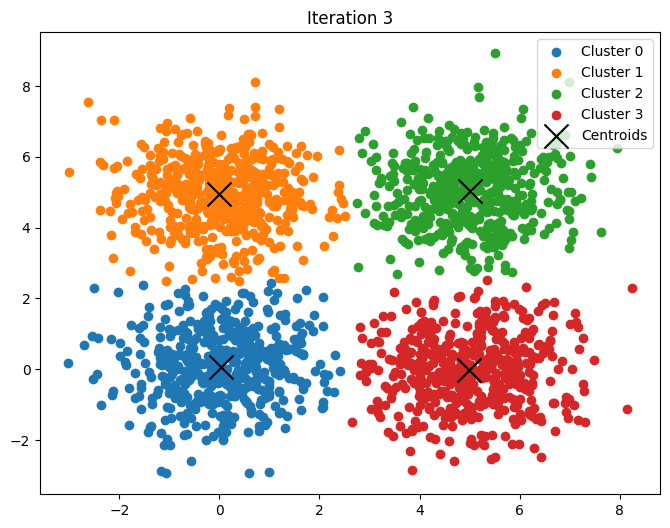

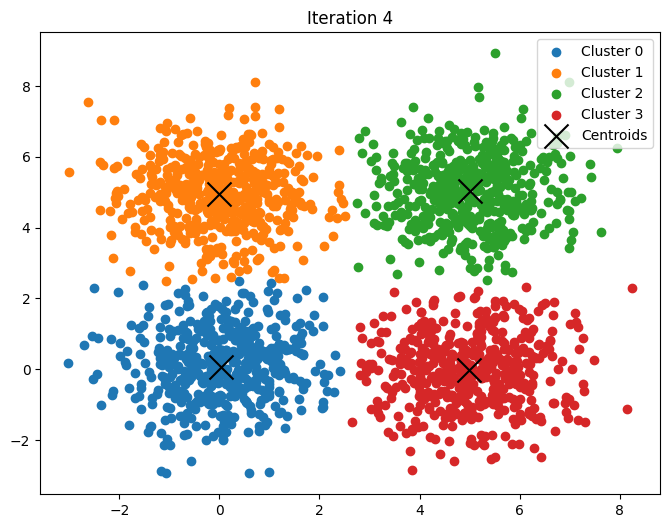

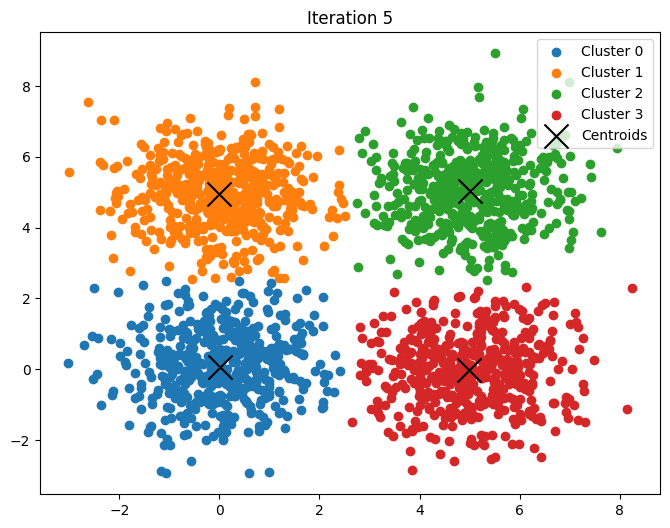

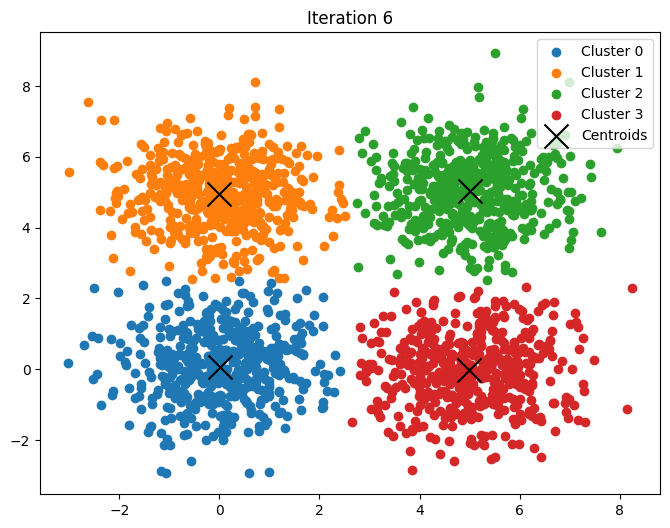

In [181]:

# Function to run KMeans and return the final cost
def run_kmeans(n_clusters, X):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    return kmeans.costs[-1], kmeans.labels_history, kmeans.centroids_history

# Run KMeans for different values of n_clusters and store the final costs
n_clusters_list = [2, 3, 4, 6, 8, 10, 20]
final_costs = {}
labels_histories = {}
centroids_histories = {}

for n_clusters in n_clusters_list:
    cost, labels_history, centroids_history = run_kmeans(n_clusters, X)
    final_costs[n_clusters] = cost
    labels_histories[n_clusters] = labels_history
    centroids_histories[n_clusters] = centroids_history

# Print the final costs
for n_clusters in n_clusters_list:
    print(f"{n_clusters} clusters: {final_costs[n_clusters]}")

# Plot the clusters and centroids at each iteration
def plot_kmeans(X, labels_history, centroids_history):
    for i, (labels, centroids) in enumerate(zip(labels_history, centroids_history)):
        plt.figure(figsize=(8, 6))
        for cluster in range(len(centroids)):
            plt.scatter(X[labels == cluster][:, 0], X[labels == cluster][:, 1], label=f'Cluster {cluster}')
        plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='x', label='Centroids')
        plt.title(f'Iteration {i+1}')
        plt.legend()
        plt.show()

# Plot for 3 clusters as an example
plot_kmeans(X, labels_histories[4], centroids_histories[4])

## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [168]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [169]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [170]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        covariance_matrix = np.cov(X_centered, rowvar=False)
        
        # Compute the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        
        # Sort the eigenvectors by decreasing eigenvalues
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.V = eigenvectors[:, sorted_indices]

    def transform(self, X, n_dimentions):
        X_centered = X - self.mean
        
        # Project the data onto the top n_dimensions eigenvectors
        X_reduced = np.dot(X_centered, self.V[:, :n_dimentions])
        
        return X_reduced
    
    def inverse_transform(self, X_reduced, n_dimensions):
        # Reconstruct the data from the reduced dimensions
        X_reconstructed = np.dot(X_reduced, self.V[:, :n_dimensions].T) + self.mean
        
        return X_reconstructed



Run the algorithm on MNIST dataset.

In [171]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

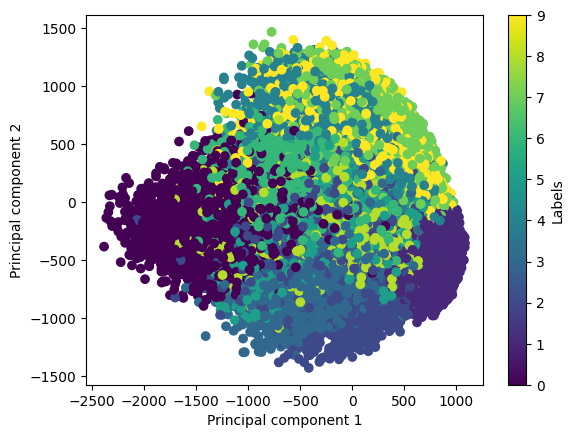

In [172]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

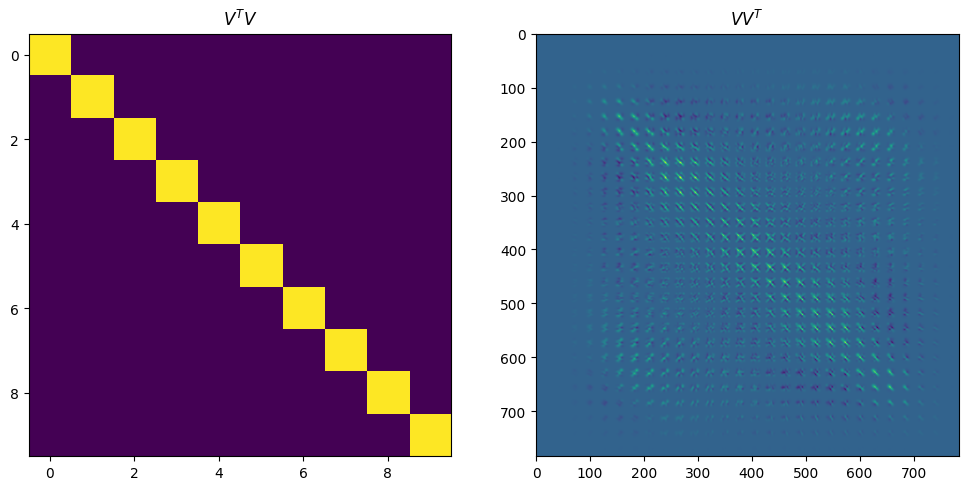

In [173]:
V = pca.V[:, :10]

# Compute V^T V and V V^T
V_T_V = np.dot(V.T, V)
V_V_T = np.dot(V, V.T)

# Plot the matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(V_T_V, cmap='viridis')
axs[0].set_title(r'$V^T V$')

axs[1].imshow(V_V_T, cmap='viridis')
axs[1].set_title(r'$V V^T$')

plt.show()


Your Explanation:

**\( V^T V \)** is a smaller, ( r x r \)  matrix, an identity matrix if and only if the vectors (V) it is composed of are orthonormal. It is of dimension \( r x r \), and each cell contains the dot product of a pair of vectors (on the diagonal, it is the dot product of the vector with itself). This matrix focuses on relationships among the principal components themselves.

**\( V V^T \)** is a larger, \( d x d \) matrix, matrix is the projection matrix onto the subspace spanned by the solution of the PCA (Principal Component Analysis), specifically, the subspace formed by the first r  largest principal components. Multiplying by this matrix performs a "reconstruction" in a reduced dimension, which is why, in the MNIST example, the reconstructed image is not very clear. This matrix reflects how the original features are reconstructed from their projections onto the principal components.



Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [174]:
def pca_reconstruction(x, n_dimentions):
    x_reduced = pca.transform(x.reshape(1, -1), n_dimentions)
    x_reconstructed = pca.inverse_transform(x_reduced, n_dimentions)
    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


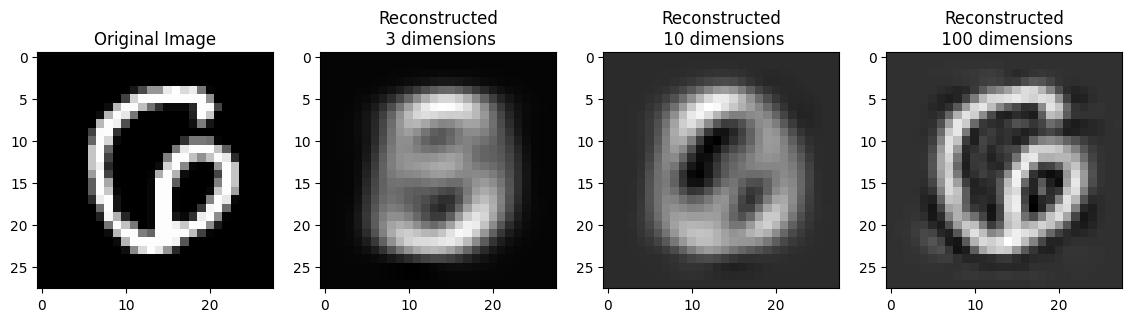

In [175]:
# Get a random image from the dataset
random_index = np.random.randint(0, X.shape[0])
sample = X[random_index]

dimensions = [3, 10, 100]
reconstructed_images = [pca_reconstruction(sample, n) for n in dimensions]

# Plot the original and reconstructed images
fig, axs = plt.subplots(1, len(dimensions) + 1, figsize=(14, 5))

axs[0].imshow(sample.reshape(28, 28), cmap='gray')
axs[0].set_title('Original Image')

for i, (reconstructed_image, n) in enumerate(zip(reconstructed_images, dimensions)):
    axs[i + 1].imshow(reconstructed_image.reshape(28, 28), cmap='gray')
    axs[i + 1].set_title(f'Reconstructed\n {n} dimensions')

plt.show()
